In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:

df1 = pd.read_csv(
    "data.csv",
    comment="#",
    engine="python"
)


In [51]:
df1.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [52]:
df1.shape

(39212, 289)

In [53]:
cols = list(df1.columns)



In [54]:
#Planet related columns
planet_cols = [c for c in cols if c.startswith('pl_')]


In [55]:
#star related columns
star_cols = [c for c in cols if c.startswith('st_')]


In [56]:
#observational(System position, motion & brightness)
system_obs_cols = [
    c for c in cols
    if c.startswith((
        'sy_', 'glat', 'glon', 'elat', 'elon',
        'dec', 'ra'
    ))
]


In [57]:
# ID columns
catalog_cols = [
    c for c in cols
    if c.startswith((
        'gaia_', 'tic_', 'hip_', 'hd_'
    ))
]


In [58]:
#metadat columns
metadata_cols = [
    c for c in cols
    if c.startswith((
        'row', 'release', 'pubdate', 'default_flag'
    ))
]


In [59]:
print("Planet columns:", len(planet_cols))
print("Star columns:", len(star_cols))
print("System observational columns:", len(system_obs_cols))
print("Catalog columns:", len(catalog_cols))
print("Metadata columns:", len(metadata_cols))


Planet columns: 127
Star columns: 50
System observational columns: 81
Catalog columns: 5
Metadata columns: 4


In [60]:
drop_cols = system_obs_cols + catalog_cols + metadata_cols
df2 = df1.drop(columns=drop_cols)


In [61]:
df2.head()

,pl_name,hostname,pl_letter,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,...,st_radverr2,st_radvlim,pl_pubdate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,11 Com b,11 Com,b,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,...,NaN,NaN,2023-08,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,11 Com b,11 Com,b,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,...,NaN,NaN,2008-01,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,11 Com b,11 Com,b,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,...,NaN,NaN,2011-08,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,11 UMi b,11 UMi,b,0,Radial Velocity,2009,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,2009-10,Ground,Thueringer Landessternwarte Tautenburg,...,NaN,NaN,2009-10,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,11 UMi b,11 UMi,b,0,Radial Velocity,2009,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,2009-10,Ground,Thueringer Landessternwarte Tautenburg,...,NaN,NaN,2017-03,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [62]:
# Select only required features for ML
df3 = df2[[
    'pl_rade',
    'pl_bmasse',
    'pl_orbper',
    'pl_orbsmax',
    'pl_eqt',
    'pl_dens',
    'st_teff',
    'st_lum',
    'st_met',
    'st_spectype'
]]


In [63]:
df3.describe()

,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met
count,27015.000000,7075.000000,3.587100e+04,21936.000000,17182.000000,2713.000000,35691.000000,9642.000000,24765.000000
mean,5.448188,742.187897,1.219128e+04,4.727505,880.352515,6.175560,5462.230067,-0.149243,-0.022364
std,71.897105,1559.580492,2.123765e+06,181.067690,428.658514,65.351062,993.735003,0.718795,0.226952
min,0.270000,0.015000,9.070629e-02,0.004400,34.000000,0.000740,415.000000,-4.660000,-2.500000
25%,1.550000,13.326729,4.396000e+00,0.054538,568.000000,0.560000,5099.000000,-0.461190,-0.150000
50%,2.300000,191.969320,1.033929e+01,0.100860,797.000000,1.330000,5613.000000,-0.082860,-0.003900
75%,3.260000,689.038165,2.665656e+01,0.219000,1104.750000,3.690000,5951.000000,0.304150,0.120000
max,4282.980000,25426.400000,4.020000e+08,19000.000000,4050.000000,2331.000000,57000.000000,3.260760,7.790000


In [64]:
df3.isnull().sum()

pl_rade        12197
pl_bmasse      32137
pl_orbper       3341
pl_orbsmax     17276
pl_eqt         22030
pl_dens        36499
st_teff         3521
st_lum         29570
st_met         14447
st_spectype    36322
dtype: int64

In [65]:
df3.duplicated().sum()

5586

In [66]:
df4 = df3.drop_duplicates()

In [67]:
df4.describe()

,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met
count,21636.000000,6986.000000,3.048600e+04,16484.000000,11809.000000,2712.000000,30299.000000,9628.000000,19392.000000
mean,5.069686,745.794550,1.433976e+04,6.234121,904.216946,6.177471,5443.138394,-0.148836,0.001109
std,57.847632,1564.332126,2.303710e+06,208.855553,448.846075,65.363038,1034.119572,0.718529,0.216894
min,0.270000,0.015000,9.070629e-02,0.004400,34.000000,0.000740,415.000000,-4.660000,-2.500000
25%,1.590000,13.302500,4.301663e+00,0.054000,575.350000,0.560000,5070.000000,-0.461190,-0.120000
50%,2.360000,195.301821,1.021865e+01,0.102100,811.000000,1.330000,5594.000000,-0.082210,0.016400
75%,3.480250,689.690236,2.671607e+01,0.241992,1146.000000,3.690000,5928.000000,0.304177,0.140000
max,4282.980000,25426.400000,4.020000e+08,19000.000000,4050.000000,2331.000000,57000.000000,3.260760,7.790000


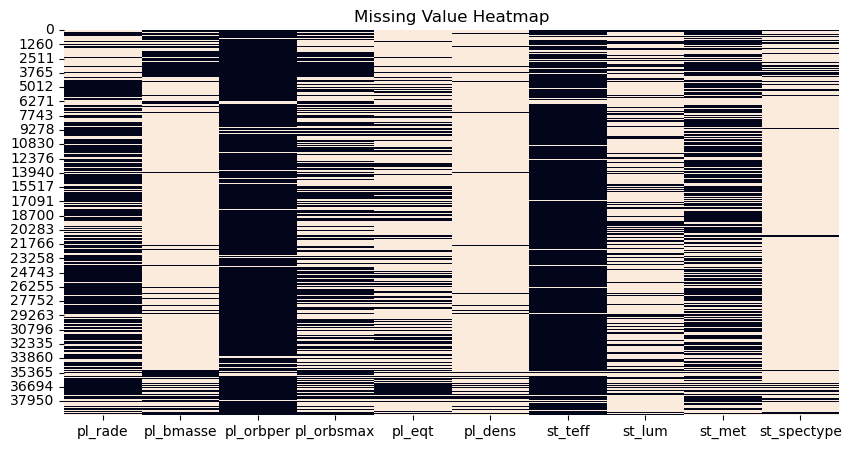

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(df4.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


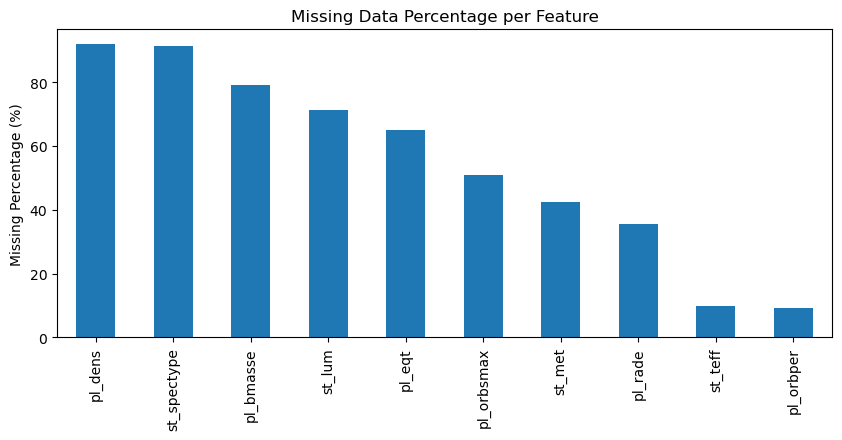

In [69]:
missing_pct = df4.isnull().mean() * 100

plt.figure(figsize=(10,4))
missing_pct.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Data Percentage per Feature")
plt.show()


In [70]:
# Handling Missing Data
planet_cols = [
    'pl_rade', 'pl_bmasse', 'pl_orbper',
    'pl_orbsmax', 'pl_eqt', 'pl_dens'
]

for col in planet_cols:
    df4.loc[:, col] = df4[col].fillna(df4[col].median())


In [71]:
#Handling Missing Data
df4.loc[:, 'st_teff'] = df4['st_teff'].fillna(df4['st_teff'].median())
df4.loc[:, 'st_lum'] = df4['st_lum'].fillna(df4['st_lum'].median())
df4.loc[:, 'st_met'] = df4['st_met'].fillna(df4['st_met'].median())



In [72]:
# Handling Missing Data
df4.loc[:, 'st_spectype'] = df4['st_spectype'].fillna(
    df4['st_spectype'].mode()[0]
)


In [73]:
df5 = df4.dropna(how='all')


In [74]:
df5.isnull().sum()


pl_rade        0
pl_bmasse      0
pl_orbper      0
pl_orbsmax     0
pl_eqt         0
pl_dens        0
st_teff        0
st_lum         0
st_met         0
st_spectype    0
dtype: int64

In [75]:
df6 = df5[
    (df5['pl_rade'] > 0) &          # radius must be positive
    (df5['pl_bmasse'] > 0) &        # mass must be positive
    (df5['pl_orbper'] > 0) &        # orbital period must be positive
    (df5['pl_orbsmax'] > 0) &       # distance must be positive
    (df5['pl_eqt'] > 0) &           # temperature must be > 0 K
    (df5['pl_dens'] > 0) &          # density must be positive
    (df5['st_teff'] > 0)            # star temperature must be > 0 K
]


In [76]:
#Outlier Detection and Treatment
from scipy import stats
import numpy as np

numeric_cols = df6.select_dtypes(include=np.number)

z_scores = np.abs(stats.zscore(numeric_cols))

df6 = df6[(z_scores < 3).all(axis=1)]


In [77]:
for col in numeric_cols.columns:
    Q1 = df6[col].quantile(0.25)
    Q3 = df6[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df6[col] = df6[col].clip(lower, upper)


In [78]:
df6.describe()



,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met
count,30987.000000,3.098700e+04,30987.000000,3.098700e+04,30987.0,3.098700e+04,30987.000000,3.098700e+04,30987.000000
mean,2.400029,1.953018e+02,17.072323,1.021000e-01,811.0,1.330000e+00,5493.950436,-8.221000e-02,0.018779
std,0.732265,8.646024e-11,16.249919,3.599956e-14,0.0,1.025419e-12,589.915873,2.324567e-14,0.054407
min,1.040000,1.953018e+02,0.090706,1.021000e-01,811.0,1.330000e+00,4137.000000,-8.221000e-02,-0.062625
25%,2.030000,1.953018e+02,4.943042,1.021000e-01,811.0,1.330000e+00,5187.000000,-8.221000e-02,0.000000
50%,2.360000,1.953018e+02,10.218653,1.021000e-01,811.0,1.330000e+00,5594.000000,-8.221000e-02,0.016400
75%,2.690000,1.953018e+02,23.089388,1.021000e-01,811.0,1.330000e+00,5887.000000,-8.221000e-02,0.041750
max,3.680000,1.953018e+02,50.308908,1.021000e-01,811.0,1.330000e+00,6937.000000,-8.221000e-02,0.104375


In [79]:
#feature Engineering


In [80]:
# Measure how close planet temperature is to Earth-like temperature
temp_score = 1 - abs(df6['pl_eqt'] - 288) / 288


In [81]:
# Measure how close planet size is to Earth size
radius_score = 1 - abs(df6['pl_rade'] - 1)


In [82]:
# Measure how close planet distance is to Earth’s orbit
distance_score = 1 - abs(df6['pl_orbsmax'] - 1)


In [83]:
# Measure how similar the star's energy output is to the Sun
luminosity_score = 1 - abs(df6['st_lum'] - 1)


In [84]:
# Final habitability score (average of all four factors)
df6['habitability_score'] = (
    temp_score +
    radius_score +
    distance_score +
    luminosity_score
) / 4


In [85]:
df6.head()

,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,st_spectype,habitability_score
6,2.36,195.301821,10.218653,0.1021,811.0,1.33,5594.0,-0.08221,0.016400,G0 V,-0.289021
10,2.36,195.301821,10.218653,0.1021,811.0,1.33,5594.0,-0.08221,0.016400,G0 V,-0.289021
11,2.36,195.301821,50.308908,0.1021,811.0,1.33,5594.0,-0.08221,0.104375,K0 V,-0.289021
13,2.36,195.301821,50.308908,0.1021,811.0,1.33,5280.0,-0.08221,0.104375,G0 V,-0.289021
14,2.36,195.301821,50.308908,0.1021,811.0,1.33,5338.0,-0.08221,0.104375,G0 V,-0.289021


In [86]:
# Measure how close star temperature is to Sun temperature
star_temp_score = 1 - abs(df6['st_teff'] - 5778) / 5778


In [87]:
# Measure how stable the star's radiation output is
star_lum_score = 1 - abs(df6['st_lum'] - 1)


In [88]:
# Final stellar compatibility score
df6['stellar_compatibility'] = (
    star_temp_score +
    star_lum_score
) / 2


In [89]:
# Measure orbital stability based on orbital period
df6['orbital_stability'] = 1 / (1 + abs(df6['pl_orbper'] - 365))


In [90]:
# Convert star type into numerical format using One-Hot Encoding
df6 = pd.get_dummies(df6, columns=['st_spectype'])


In [91]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Select all numeric columns
numeric_cols = df6.select_dtypes(include='number').columns

# Apply scaling
df6[numeric_cols] = scaler.fit_transform(df6[numeric_cols])


In [92]:
# Create binary target variable for habitability
df6['habitable'] = (
    (df6['habitability_score'] > 0.6) &
    (df6['stellar_compatibility'] > 0.6)
).astype(int)


In [93]:
df6.head()



,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,habitability_score,...,st_spectype_M4.5,st_spectype_M4.5 V,st_spectype_M4.5 Ve,st_spectype_M5.0 V,st_spectype_M5.0+0.5-0.5,st_spectype_M5.5 V,st_spectype_M8,st_spectype_M8.5,st_spectype_WD,habitable
6,-0.054665,-5.684342e-14,-0.421773,-1.387779e-17,0.0,4.440892e-16,0.169602,-2.775558e-17,-0.043729,0.054665,...,False,False,False,False,False,False,False,False,False,0
10,-0.054665,-5.684342e-14,-0.421773,-1.387779e-17,0.0,4.440892e-16,0.169602,-2.775558e-17,-0.043729,0.054665,...,False,False,False,False,False,False,False,False,False,0
11,-0.054665,-5.684342e-14,2.045372,-1.387779e-17,0.0,4.440892e-16,0.169602,-2.775558e-17,1.573291,0.054665,...,False,False,False,False,False,False,False,False,False,0
13,-0.054665,-5.684342e-14,2.045372,-1.387779e-17,0.0,4.440892e-16,-0.362685,-2.775558e-17,1.573291,0.054665,...,False,False,False,False,False,False,False,False,False,0
14,-0.054665,-5.684342e-14,2.045372,-1.387779e-17,0.0,4.440892e-16,-0.264365,-2.775558e-17,1.573291,0.054665,...,False,False,False,False,False,False,False,False,False,0


In [94]:
df6.describe()


,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,habitability_score,stellar_compatibility,orbital_stability,habitable
count,3.098700e+04,3.098700e+04,3.098700e+04,3.098700e+04,30987.0,3.098700e+04,3.098700e+04,3.098700e+04,3.098700e+04,3.098700e+04,3.098700e+04,3.098700e+04,30987.000000
mean,7.337712e-17,-5.684342e-14,5.870169e-17,-1.387779e-17,0.0,4.440892e-16,-6.438842e-16,-2.775558e-17,3.393692e-17,-1.027280e-16,3.989881e-16,9.685780e-16,0.076322
std,1.000016e+00,0.000000e+00,1.000016e+00,0.000000e+00,0.0,0.000000e+00,1.000016e+00,0.000000e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,0.265517
min,-1.857321e+00,-5.684342e-14,-1.045045e+00,-1.387779e-17,0.0,4.440892e-16,-2.300281e+00,-2.775558e-17,-1.496244e+00,-1.747991e+00,-2.596478e+00,-9.862321e-01,0.000000
25%,-5.053289e-01,-5.684342e-14,-7.464330e-01,-1.387779e-17,0.0,4.440892e-16,-5.203376e-01,-2.775558e-17,-3.451686e-01,-3.959991e-01,-3.965218e-01,-7.267447e-01,0.000000
50%,-5.466489e-02,-5.684342e-14,-4.217732e-01,-1.387779e-17,0.0,4.440892e-16,1.696025e-01,-2.775558e-17,-4.372931e-02,5.466489e-02,3.777020e-01,-4.365907e-01,0.000000
75%,3.959991e-01,-5.684342e-14,3.702888e-01,-1.387779e-17,0.0,4.440892e-16,6.662915e-01,-2.775558e-17,4.222150e-01,5.053289e-01,6.655259e-01,3.087485e-01,0.000000
max,1.747991e+00,-5.684342e-14,2.045372e+00,-1.387779e-17,0.0,4.440892e-16,2.446235e+00,-2.775558e-17,1.573291e+00,1.857321e+00,1.064909e+00,2.085194e+00,1.000000


In [95]:
df6.isnull().sum()

pl_rade               0
pl_bmasse             0
pl_orbper             0
pl_orbsmax            0
pl_eqt                0
                     ..
st_spectype_M5.5 V    0
st_spectype_M8        0
st_spectype_M8.5      0
st_spectype_WD        0
habitable             0
Length: 214, dtype: int64

In [96]:
# Save the final preprocessed dataset to CSV
df6.to_csv(
    "preprocessed.csv",
    index=False
)
